<style>
    h1 {
        border-bottom: 2px solid #DADCDD;
    }
</style>

# Asg-5 focuses on questions graded by the mentioned TAs:

## LT: One PL question

## SV: One PL question

## AR: One PDA question

## XL: One PDA question


## You must present your proofs using the outline described on Slide 19 of Lec11.pptx (look around this slide number if the slide has shifted; it comes near the flow-charts)

## Asg-5 imports 


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers  import *
from jove.Def_md2mc   import *
from jove.AnimatePDA  import *
from jove.Def_PDA     import *
from jove.LangDef     import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

 "help(AnimatePDA)" gives you info on how to use animations with PDA 
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)



# 1 (LT): Prove that this language is not regular (LT)

## $$L_{if} = \{ a^i b^j c^k \;:\; i,j,k\ge 0,\; \land\; {\rm if}\: (i=2) \rightarrow (j=k)  \}$$

#### Hint: Consider the reverse of $L_{if}$ calling it the language $LR_{if}$, and prove that $LR_{if}$ is non-regular, using the PL

#### Then write a line justifying why this means that $L_{if}$ is non-regular.
 

## Pumping Lemma Statement
  - Let $L$ be a RegLang $\longrightarrow$ 
      - $\exists$ $p\geq1$ depednign only on $L$ $\ni$ $\forall$ $w\in L$ of length $\geq p$ can be writen: $$w=xyz$$
          - _($p$ is the pumping length)_
          - _i.e._ $w$ can be devided into three substrings
      - **AND** satisfy the following:
         1. $|y|\geq 1$
              - _i.e._ The loop $y$ must have a length of at least 1.
         2. $|xy|\leq p$
              - _i.e._ The first instance of $y$ must occur within the first $p$ characters.
                  - $\therefore$ _(given Statement 1)_ $|x|$ must be smaller then $p$ ($|x|<p$)
         3. $(xy^nz\in L)$ $\forall n\geq0$
              - _i.e._ The loop $y$ is the substring that can be _"pumped"_.
                  - (_i.e._ $y$ can be removed or repeated any number of times, and the resulting string will always be in $L$) 

### Pumping Lema Formal Expression:
<math>
\begin{array}{l}                                                                                                                                       
(\forall  L\subseteq \Sigma^*)  \\                                                                                                                     
\quad      (\text{regular}(L) \Rightarrow \\                                                                                                           
\quad      ((\exists p\geq 1) ( (\forall w\in L) ((|w|\geq p) \Rightarrow \\                                                                           
\quad ((\exists x,y,z \in \Sigma^*) (w=xyz \land (|y|\geq 1 \land |xy|\leq p \land                                                                
(\forall n\geq 0)(xy^nz\in L))))))))                                                                                                                   
\end{array} 
</math>
 

In [12]:
maxL = 4
L_if = { (('a'*i + 'b'*j + 'c'*j) if i==2 else ('a'*i + 'b'*j + 'c'*k)) for i in range(maxL) for j in range(maxL) for k in range(maxL) }
L_if_exp = { ((f"a^{i}b^{j}*c^{j}") if i==2 else (f"a^{i}b^{j}c^{k}")) for i in range(maxL) for j in range(maxL) for k in range(maxL) }
LR_if = lrev(L_if)
print(f"L_if: {L_if}\n" +
        # f"L_if_exp: {L_if_exp}\n" +
        f"LR_if: {LR_if}")

L_if: {'', 'b', 'abcc', 'bbc', 'abbbcc', 'bbbccc', 'aabbcc', 'aaabbcc', 'aaabcc', 'bcc', 'aaac', 'abb', 'abbc', 'aaabbbcc', 'ac', 'aaabc', 'aaabb', 'a', 'bbccc', 'aabc', 'bb', 'ccc', 'accc', 'aaabbbccc', 'aaab', 'abbcc', 'aaabbbc', 'bccc', 'abc', 'c', 'abbbc', 'bbcc', 'aabbbccc', 'abbccc', 'bbbc', 'aaabbccc', 'bbb', 'aaabbc', 'bbbcc', 'bc', 'acc', 'abbbccc', 'aaacc', 'ab', 'aaabccc', 'aaabbb', 'cc', 'abccc', 'aaa', 'aaaccc', 'aa', 'abbb'}
LR_if: {'', 'b', 'bbbaaa', 'cccbbbaa', 'ccbba', 'ccaaa', 'cccbb', 'ccbb', 'cca', 'cccbbba', 'cbaa', 'cccbbbaaa', 'cccbbaaa', 'cbbaaa', 'baaa', 'ccba', 'a', 'cbaaa', 'ccbbba', 'ccbbaa', 'bbaaa', 'ccbbbaaa', 'bb', 'ccc', 'cbbbaaa', 'cbbb', 'cccbaaa', 'c', 'cbb', 'ba', 'cccb', 'bbb', 'ccbbaaa', 'bba', 'cccbbb', 'ccbaaa', 'cbba', 'ca', 'cbbba', 'cba', 'cb', 'cccbba', 'cccaaa', 'caaa', 'ccca', 'cc', 'aaa', 'cccba', 'aa', 'bbba', 'ccb', 'ccbbb'}


## Proof Outline
_Look at answer to quiz 5 q3 for better hint_
  - Let $w$, $x$, $y$, $z$, $p$ and $n$ be as used in the [Pumping Lemma Statement](#pumping-lemma-statement)
      - $\exists$ $w\in LR_{if}$ $\ni$ $w=c^pb^pa^p$
          - For which we know $|w=c^pb^pa^p|>p$
          - By the [Pumping Lemma](#pumping-lemma-statement) there must $\exists$ some decomposition $w=xyz$ w/ $|xy|\geq p$ $\land$ $|y|\geq1$ 
          - $\ni$ $xy^nz\in LR_{if}$ $\forall n\geq0$.
          - Because order matters in order for that statement to be true $x\in RE($`a*`$)$ $\land$ $y\in RE($`b*`$)$ $\land$ $z\in RE($`c*`$)$
          - $\therefore$ if whenever  

## So the official proof presentation is this:
  - Let $w$, $x$, $y$, $z$, $p$ and $n$ be as used in the [Pumping Lemma Statement](#pumping-lemma-statement) 
      - Because all `'a'`'s need to come before all `'b'`'s which need to come before all `'c'`'s in order for the string to be $\in L_{if}$ 
          & $y$ needs to be a repeatable pattern $\ni$ $xy^nz\in L_{if}$ $\forall n\geq0$ 
          in order for that statement to be true $y\in RE($`a*+b*+c*`$)$ (_i.e._ all the same character)
      - $\therefore$ given any string $\in L_{if}$ where $i=2$ $\;\;\Rightarrow\;\;$ $(xy^nz\notin L_{if})$ $\forall n\neq1$
          since the number of `'b'`'s will not be equal to the number of `'c'`'s in the resulting string.
      - $\therefore$ $L_{if}$ can't be a regular language

# 2 (SV): Prove that the language $L_{Add}$ is not regular 

## $L_{Add} = \{ x=y+z : x,y,z \in \{0,1\}^* \; {\rm and}\; condition(x,y,z)\; {\rm holds} \}$
          
 

## Here, $condition(x,y,z)$ means $x$, $y$, and $z$ are bit strings of the form $101 = 10 + 11$  

## In general, $condition$ says that the bit patterns represent a correct binary addition.

 

## More examples of strings in the language $L_{Add}$ are below:

* $101=10+11$ 

* $1000 = 100 + 100$

* $1011 = 110 + 101$

In [21]:
# this is just some messing around
maxL = 4
L_Add = { (f"{{:0{minL}b}}={{:0{minL}b}}+{{:0{minL}b}}".format(x,y,z) if (x==y+z) else '') for x in range(maxL) for y in range(maxL) for z in range(maxL) for minL in range(maxL) }
print(L_Add)

{'', '0=0+0', '10=00+10', '001=000+001', '10=10+0', '000=000+000', '11=11+00', '001=001+000', '010=000+010', '011=001+010', '10=01+01', '01=00+01', '10=1+1', '01=01+00', '10=0+10', '11=0+11', '1=1+0', '11=01+10', '00=00+00', '010=010+000', '10=10+00', '11=10+1', '011=011+000', '1=0+1', '11=00+11', '011=000+011', '11=11+0', '11=1+10', '011=010+001', '010=001+001', '11=10+01'}


## Proof outline


## So the official proof presentation is this:

- Let $w$, $p$, and $n$ be as used in the [Pumping Lema "Statement"](#pumping-lemma-statement) 
   & Let $a$, $b$ and $c$ be used to represent $x$, $y$ and $z$ from the [Pumping Lemma "Statement"](#pumping-lemma-statement) respectivly
   (_i.e._ $w=abc$, _etc._).
- For any string $\in L_{Add}$ is true 
   there $\exists$ an infinite number of other strings $\in L_{Add}$ 
   where $x$, $y$ and/or $z$ have a string of any number of `'0'`'s added to the begining.
    -  $\therefore$ `"00000000=0+0"`,`"0=000000+0","0=0+000000"`,_etc_$\in L_{Add}$
    - $\therefore$ assume that you have some string $w=abc$ $\in L_{Add}$ 
       where $x$,$y$ & $z$ are not binary strings equal to 0 
       that conforms to $(|b|\geq1 \:\land\: |ab|\leq p \:\land\: |a|<p \:\land\: (ab^nc\in L_{Add}\:\forall n\qeq0))$, 
       no matter which substring contains what portion of the string (so long as it matches the parameters).
    - You can always tack more `'0'`'s onto the begining of $a$ and it will still be $\in L_{Add}$.
    - $\therefore$ if you concatinate $0^p$ onto the begining of aforementioned string and this new string will still be $\in L_{Add}$.
    - $\therefore$ even if $|a|=0$ by adding $p$ `'0'`'s onto the front of it $|a|\nless p$, but it is still $\in L_{Add}$
    - $\therefore$ $L_{Add}$ can't be a regular language (proof by contradiction).

# 3 (AR): Design a PDA `a2b` for the language $\{a^i b^j : i,j\ge 0, {\rm and}\; (j = 2i) \}$
## That is, strings of the form $abb$, $aabbbb$, $aaabbbbbb$, etc.

## Put a "header block" of comments (before you list the PDA transitions) that describes the overall stacking strategy - e.g.

* !! The PDA uses the stack in THIS WAY while a's arrive

* !! Then when b's arrive, the PDA does THIS

* !! After b's, if $a$'s arrive, the PDA does THIS


## After that, fully document your design (line by line)

## Then, test your PDA on these strings

1. $\varepsilon$ (accept)

2. $abb$ (accept)

3. $aabbbb$ (accept)

4. $aaabbbbbb$ (accept)



5. $ab$ (reject)

6. $b$ (reject)

7. $aba$ (reject)

8. $abba$ (reject)

##  PLUS add two more accepting and two more rejecting tests of your own

In [40]:
a2b = md2mc('''
PDA

!! Overall Algorithm:
!!  1. If char is 'a' & stack empty -> push 2 'a's onto the stack & go to step 2
!!  2. If char is 'a' & top of stack = 'a' -> push 2 'a's into the stack
!!  3. If char is 'b' & top of stack = 'a' -> push nothing onto the stack
!!  4. If next char is ε & stack empty -> push nothing onto the stack


IF  : a,#;aa#   -> Sa   !! Make sure string starts with an 'a'
Sa  : a,a;aaa   -> Sa 
Sa  : b,a;''    -> Sb
Sb  : b,a;''    -> Sb
Sb  : '',#;#    -> F

''')

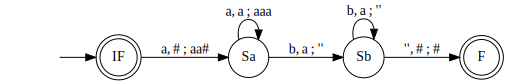

In [41]:
dotObj_pda(a2b)

In [42]:
explore_pda('', a2b)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [43]:
explore_pda('abb', a2b)

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'abb', '#')
->  ('Sa', 'bb', 'aa#')
->  ('Sb', 'b', 'a#')
->  ('Sb', '', '#')
->  ('F', '', '#') .


In [44]:
explore_pda('aabbbb', a2b)

String aabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aabbbb', '#')
->  ('Sa', 'abbbb', 'aa#')
->  ('Sa', 'bbbb', 'aaaa#')
->  ('Sb', 'bbb', 'aaa#')
->  ('Sb', 'bb', 'aa#')
->  ('Sb', 'b', 'a#')
->  ('Sb', '', '#')
->  ('F', '', '#') .


In [45]:
explore_pda('aaabbbbbb', a2b)

String aaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaabbbbbb', '#')
->  ('Sa', 'aabbbbbb', 'aa#')
->  ('Sa', 'abbbbbb', 'aaaa#')
->  ('Sa', 'bbbbbb', 'aaaaaa#')
->  ('Sb', 'bbbbb', 'aaaaa#')
->  ('Sb', 'bbbb', 'aaaa#')
->  ('Sb', 'bbb', 'aaa#')
->  ('Sb', 'bb', 'aa#')
->  ('Sb', 'b', 'a#')
->  ('Sb', '', '#')
->  ('F', '', '#') .


In [46]:
explore_pda('ab', a2b)

String ab rejected by your PDA :-(
Visited states are:
{('Sb', '', 'a#'), ('IF', 'ab', '#'), ('Sa', 'b', 'aa#')}


In [47]:
explore_pda('b', a2b)

String b rejected by your PDA :-(
Visited states are:
{('IF', 'b', '#')}


In [48]:
explore_pda('aba', a2b)

String aba rejected by your PDA :-(
Visited states are:
{('Sb', 'a', 'a#'), ('Sa', 'ba', 'aa#'), ('IF', 'aba', '#')}


In [49]:
explore_pda('abba', a2b)

String abba rejected by your PDA :-(
Visited states are:
{('F', 'a', '#'), ('Sb', 'a', '#'), ('IF', 'abba', '#'), ('Sb', 'ba', 'a#'), ('Sa', 'bba', 'aa#')}


## Now some more tests of yours below 
#### _(add more cells as needed)_

### Accepting Tests

In [50]:
explore_pda('aaaabbbbbbbb', a2b)

String aaaabbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaabbbbbbbb', '#')
->  ('Sa', 'aaabbbbbbbb', 'aa#')
->  ('Sa', 'aabbbbbbbb', 'aaaa#')
->  ('Sa', 'abbbbbbbb', 'aaaaaa#')
->  ('Sa', 'bbbbbbbb', 'aaaaaaaa#')
->  ('Sb', 'bbbbbbb', 'aaaaaaa#')
->  ('Sb', 'bbbbbb', 'aaaaaa#')
->  ('Sb', 'bbbbb', 'aaaaa#')
->  ('Sb', 'bbbb', 'aaaa#')
->  ('Sb', 'bbb', 'aaa#')
->  ('Sb', 'bb', 'aa#')
->  ('Sb', 'b', 'a#')
->  ('Sb', '', '#')
->  ('F', '', '#') .


In [51]:
explore_pda('aaaaabbbbbbbbbb', a2b)

String aaaaabbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaaabbbbbbbbbb', '#')
->  ('Sa', 'aaaabbbbbbbbbb', 'aa#')
->  ('Sa', 'aaabbbbbbbbbb', 'aaaa#')
->  ('Sa', 'aabbbbbbbbbb', 'aaaaaa#')
->  ('Sa', 'abbbbbbbbbb', 'aaaaaaaa#')
->  ('Sa', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('Sb', 'bbbbbbbbb', 'aaaaaaaaa#')
->  ('Sb', 'bbbbbbbb', 'aaaaaaaa#')
->  ('Sb', 'bbbbbbb', 'aaaaaaa#')
->  ('Sb', 'bbbbbb', 'aaaaaa#')
->  ('Sb', 'bbbbb', 'aaaaa#')
->  ('Sb', 'bbbb', 'aaaa#')
->  ('Sb', 'bbb', 'aaa#')
->  ('Sb', 'bb', 'aa#')
->  ('Sb', 'b', 'a#')
->  ('Sb', '', '#')
->  ('F', '', '#') .


### Rejecting Tests

In [52]:
explore_pda('bbbbaa', a2b)

String bbbbaa rejected by your PDA :-(
Visited states are:
{('IF', 'bbbbaa', '#')}


In [53]:
explore_pda('abbabb', a2b)

String abbabb rejected by your PDA :-(
Visited states are:
{('Sb', 'abb', '#'), ('Sb', 'babb', 'a#'), ('IF', 'abbabb', '#'), ('F', 'abb', '#'), ('Sa', 'bbabb', 'aa#')}


# 4 (XL):  Design a PDA for $L_{if}$

***Hint:*** when a=2, the PDA matches b's and c's (using the stack for this match) <br/>
&emsp; Else it only checks their order of arrival (and simply ignores the stack)

### Test your PDA on these strings

* aa bbb ccc   (accept)

* aa bbbb cccc (accept)
 
* aa         (accept)

* a bbb cccc (accept)

* aaa bb c   (accept)

* $\varepsilon$    (accept, as there are zero a's)

* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)


* c b        (reject)

* aa bb cc a (reject)

* a bb a     (reject)

* ccac       (reject)

* abba       (reject)

* baac       (reject)

* ac         (reject)


### Then add three more accepting cases and three more rejecting cases below

## Document the tests saying why they must pass/fail

In [54]:
Lif = md2mc('''
PDA

!! Overall Algorithm
!!  0. If ''  & last    -> RETURN true              else next & GOTO 2
!!  1. If 'a' & empty   -> push 'a' & GOTO 2
!!  2. If 'a' & pop 'a' -> push 'a' & GOTO 5        else GOTO 3
!!  3. If 'b' & empty   -> clear    & GOTO ()       else GOTO 4
!!  4. If 'c' & empty   -> clear    & GOTO ()       else RETURN false
!!  5. If ''  & last    -> RETURN true              else GOTO 6
!!  6. If 'a'           -> clear    & GOTO 5        else GOTO 7
!!  7. If 'b' & pop 'a' -> push 'b' & GOTO ()       else GOTO 8
!!  8. If 'b' & empty   -> clear    & GOTO 9        else RETURN false
!!  9. If ...


IF  : a,#;a#    -> IF
IF  : a,a;#     -> Fa
IF  : b,'';#    -> Fb
IF  : c,'';#    -> Fc

Fa  : a,'';#    -> Fa
Fa  : b,#;#     -> Fb
Fa  : b,a;b#    -> Sb

Fb  : b,#;#     -> Fb
Fb  : c,#;#     -> Fc

Fc  : c,#;#     -> Fc

Sb  : b,b;bb    -> Sb
Sb  : c,b;''    -> Sc

Sc  : c,b;''    -> Sc
Sc  : '',#;#    -> F0

''')

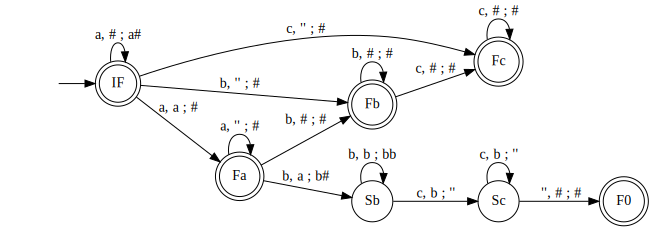

In [55]:
dotObj_pda(Lif)

## Now for all our tests

* aa bbb ccc   (accept)

In [56]:
explore_pda('aabbbccc', Lif)

String aabbbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '##')
Reached as follows:
->  ('IF', 'aabbbccc', '#')
->  ('IF', 'abbbccc', 'a#')
->  ('Fa', 'bbbccc', '##')
->  ('Fb', 'bbccc', '##')
->  ('Fb', 'bccc', '##')
->  ('Fb', 'ccc', '##')
->  ('Fc', 'cc', '##')
->  ('Fc', 'c', '##')
->  ('Fc', '', '##') .


* aa bbbb cccc (accept)
 

In [57]:
explore_pda('aabbbbcccc', Lif)

String aabbbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '##')
Reached as follows:
->  ('IF', 'aabbbbcccc', '#')
->  ('IF', 'abbbbcccc', 'a#')
->  ('Fa', 'bbbbcccc', '##')
->  ('Fb', 'bbbcccc', '##')
->  ('Fb', 'bbcccc', '##')
->  ('Fb', 'bcccc', '##')
->  ('Fb', 'cccc', '##')
->  ('Fc', 'ccc', '##')
->  ('Fc', 'cc', '##')
->  ('Fc', 'c', '##')
->  ('Fc', '', '##') .


* aa         (accept)

In [58]:
explore_pda('aa', Lif)

String aa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fa', '', '##')
Reached as follows:
->  ('IF', 'aa', '#')
->  ('IF', 'a', 'a#')
->  ('Fa', '', '##') .


* a bbb cccc (accept)

In [59]:
explore_pda('abbbcccc', Lif)

String abbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '#a#')
Reached as follows:
->  ('IF', 'abbbcccc', '#')
->  ('IF', 'bbbcccc', 'a#')
->  ('Fb', 'bbcccc', '#a#')
->  ('Fb', 'bcccc', '#a#')
->  ('Fb', 'cccc', '#a#')
->  ('Fc', 'ccc', '#a#')
->  ('Fc', 'cc', '#a#')
->  ('Fc', 'c', '#a#')
->  ('Fc', '', '#a#') .


* aaa bb c   (accept)

In [60]:
explore_pda('aaabbc', Lif)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '###')
Reached as follows:
->  ('IF', 'aaabbc', '#')
->  ('IF', 'aabbc', 'a#')
->  ('Fa', 'abbc', '##')
->  ('Fa', 'bbc', '###')
->  ('Fb', 'bc', '###')
->  ('Fb', 'c', '###')
->  ('Fc', '', '###') .


* Epsilon    (accept, as there are zero a's)

In [61]:
explore_pda('', Lif)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

In [62]:
explore_pda('abbcc', Lif)

String abbcc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '#a#')
Reached as follows:
->  ('IF', 'abbcc', '#')
->  ('IF', 'bbcc', 'a#')
->  ('Fb', 'bcc', '#a#')
->  ('Fb', 'cc', '#a#')
->  ('Fc', 'c', '#a#')
->  ('Fc', '', '#a#') .


* b c must accept too

In [63]:
explore_pda('bc', Lif)

String bc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '##')
Reached as follows:
->  ('IF', 'bc', '#')
->  ('Fb', 'c', '##')
->  ('Fc', '', '##') .


* c b        (reject)

In [64]:
explore_pda('cb', Lif)

String cb rejected by your PDA :-(
Visited states are:
{('Fc', 'b', '##'), ('IF', 'cb', '#')}


* aa bb cc a (reject)

In [65]:
explore_pda('aabbcca', Lif)

String aabbcca rejected by your PDA :-(
Visited states are:
{('Fa', 'bbcca', '##'), ('Fc', 'a', '##'), ('Fb', 'cca', '##'), ('IF', 'aabbcca', '#'), ('Fc', 'ca', '##'), ('IF', 'abbcca', 'a#'), ('Fb', 'bcca', '##')}


* a bb a     (reject)

In [66]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('Fb', 'ba', '#a#'), ('Fb', 'a', '#a#'), ('IF', 'abba', '#'), ('IF', 'bba', 'a#')}


* ccac       (reject)

In [67]:
explore_pda('ccac', Lif)

String ccac rejected by your PDA :-(
Visited states are:
{('Fc', 'cac', '##'), ('IF', 'ccac', '#'), ('Fc', 'ac', '##')}


* abba       (reject)

In [68]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('Fb', 'ba', '#a#'), ('Fb', 'a', '#a#'), ('IF', 'abba', '#'), ('IF', 'bba', 'a#')}


* baac       (reject)

In [69]:
explore_pda('baac', Lif)

String baac rejected by your PDA :-(
Visited states are:
{('Fb', 'aac', '##'), ('IF', 'baac', '#')}


* ac         (accept), as there are no b's  

In [70]:
explore_pda('ac', Lif)

String ac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '#a#')
Reached as follows:
->  ('IF', 'ac', '#')
->  ('IF', 'c', 'a#')
->  ('Fc', '', '#a#') .


* acb (reject)

In [71]:
explore_pda('acb', Lif)

String acb rejected by your PDA :-(
Visited states are:
{('IF', 'cb', 'a#'), ('IF', 'acb', '#'), ('Fc', 'b', '#a#')}


## Now, some more of your tests

### Aceppting

- `"aabc"` **accept** because there are 2 `'a'`'s and the same numebr of `'b'`'s & `'c'`'s

In [72]:
explore_pda("aabc", Lif)

String aabc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fc', '', '##')
Reached as follows:
->  ('IF', 'aabc', '#')
->  ('IF', 'abc', 'a#')
->  ('Fa', 'bc', '##')
->  ('Fb', 'c', '##')
->  ('Fc', '', '##') .


- `"aaabbb"` **accept** because there not exactly 2 `'a'`'s so the number of `'b'`'s and `'c'`'s dont need to be equal

In [73]:
explore_pda("aaabbb", Lif)

String aaabbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Fb', '', '###')
Reached as follows:
->  ('IF', 'aaabbb', '#')
->  ('IF', 'aabbb', 'a#')
->  ('Fa', 'abbb', '##')
->  ('Fa', 'bbb', '###')
->  ('Fb', 'bb', '###')
->  ('Fb', 'b', '###')
->  ('Fb', '', '###') .


### Rejecting

- `"ccbbaa"` **reject** because the letters are not in the right order

In [74]:
explore_pda("ccbbaa", Lif)

String ccbbaa rejected by your PDA :-(
Visited states are:
{('Fc', 'cbbaa', '##'), ('IF', 'ccbbaa', '#'), ('Fc', 'bbaa', '##')}


- `"bbac"` **reject** because letters aren't in the right order (and because there are 2 `'a'`'s but the number of `'b'`'s & `'c'`'s are different _\[shouldn't matter since the first reason should have already disqualified it\]_)

In [75]:
explore_pda("bbac", Lif)

String bbac rejected by your PDA :-(
Visited states are:
{('IF', 'bbac', '#'), ('Fb', 'ac', '##'), ('Fb', 'bac', '##')}


# END
